# INTRODUCTION TO THE AUTOLIB DATASET

### 1.0 Understanding the context

Usage of electric cars has seen growth with the advancement of technology. Unlike the fuel cars,electric cars are more environmentally friendly and thus sustainable. An increase in electric car usage will mean a well kept environment.

Autolib is an electric car sharing company. the company has 3 main types of electric cars: blue cars, utilib counter and the utilib 4 counter. these cars operate in the city of france.

The claim is that the mean number of blue cars returned in a certain area is different compared to the mean from another area during weekends. The company has tasked us to do an investigation to clearly determine the truth in this to aid in planning the marketing strategies and segmentation.

### 1.1 Defining the Metric for **Success**

* **Null hypothesis.**

**Ho**: The number of blue cars taken on the weekends is more than or equal to the number of cars returned on the weekends.
Ho: U1 ≥ u2

* **Alternative hypothesis.**

**H1**: The number of blue cars taken on the weekends is less than the number of cars returned on the weekends.
Ho: U1 < u2

* Hypothesis testing will be carried out. The significance level will be compared to the P-Value,and from this we will be able to make our conclusion.
P-Value < Significance level, null hypothesis will be rejected otherwise if the P-Value > Significance level we will accept the Null hypothesis.

### 1.3 Specifying data analysis question

We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made.

Is the mean number of blue cars returned in a certain area different compared to the mean from another area during weekdays?

### 1.4 Recording the Experimental Design

We'll use the autolib dataset for analysis. the data will be cleaned and any anomalies, missing values, or duplicates observed noted and dealt with.
We'll then proceed to exploratory data analysis and perform (Univariate, Bivariate and Multivariate) so as to get a deeper understanding of the data.
We'll incorporate 2 sampling methods. Both random sampling and stratified sampling will be used. The former method will be used to choose a particular sample size and the latter will help us zero in particular areas.


### 1.5 Data relevance

The autolib data set is from the previous business year 2018. This was in the latest annual report prepare by the Autolib company. It will be used to answer the business as it is well detailed and contains all important information including: car type, city, postal adress time, electric car stations details e.t.c


# 2. READING THE DATA

## 2.0 Importing libraries to be used

In [228]:
#loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm 
import pylab as py 
from statsmodels.stats import weightstats as stests
    

## 2.1 Loading our data

In [102]:
#loading the data set
#preview the first 5 entries

df=pd.read_csv('/content/autolib_daily_events_postal_code.csv')
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


## 2.2 Initial Exploration of the dataset 

In [9]:
#Previewing the bottom of the dataset
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [10]:
#Checking the shape of our dataset

df.shape

#the data has 16,085 rows and 13 columns

(16085, 13)

In [11]:
#checking the datatypes of each column
df.dtypes

#The dataset contains object and integer datatypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [14]:
#Checking for any duplicates in the dataset
df.duplicated().sum()

#there are no duplicates in our dataset

0

## 2.3 Cleaning our data

In [103]:
# Data cleaning: Dropping irrelevant columns
#  Dropping irrelevant columns 
# 
df.drop(['Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum',], axis = 1, inplace = True)
df.shape

#These columns belong to the Utilib and Utilib 14 cars which we won't be looking into as the analysis is of the blue cars 

(16085, 9)

In [104]:
#Cleaning the column names

#Removing spaces from the column names and replacing it with an underscore
df.columns = df.columns.str.replace(" ","_")
#Changing the names of the columns to lowercase
df.columns = map(str.lower, df.columns)
list(df.columns)

['postal_code',
 'date',
 'n_daily_data_points',
 'dayofweek',
 'day_type',
 'bluecars_taken_sum',
 'bluecars_returned_sum',
 'slots_freed_sum',
 'slots_taken_sum']

In [35]:
#checking for missing values
dff.isnull().sum()

# There are no missing values.

postal_code              0
date                     0
n_daily_data_points      0
dayofweek                0
day_type                 0
bluecars_taken_sum       0
bluecars_returned_sum    0
slots_freed_sum          0
slots_taken_sum          0
dtype: int64

In [105]:
#converting date_time from string to datetime.

df['date']= pd.to_datetime(df['date'])
df['date']

0       2018-01-01
1       2018-01-02
2       2018-01-03
3       2018-01-04
4       2018-01-05
           ...    
16080   2018-06-15
16081   2018-06-16
16082   2018-06-17
16083   2018-06-18
16084   2018-06-19
Name: date, Length: 16085, dtype: datetime64[ns]

In [ ]:
#Checking for outliers
col_names = ['postal_code','n_daily_data_points','bluecars_taken_sum','bluecars_returned_sum','slots_freed_sum','slots_taken_sum']
fig,ax = plt.subplots(len(col_names),figsize=(8,40))
for i , col_val in enumerate(col_names):
  sns.boxplot(y=df[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()

#### Handling Outliers

We can see outliers in each of the variables. The outliers comprises of a huge part of the data. Removing them would result to removal of a huge chunk of the dataset. Having acknowledged their presence, we'll leave them for further observation.

# 3. UNIVARIATE ANALYSIS

We'll perform univariate analysis on all the columns for the blue cars taken and returned columns and for the taken and freed slots.

Text(0, 0.5, 'count')

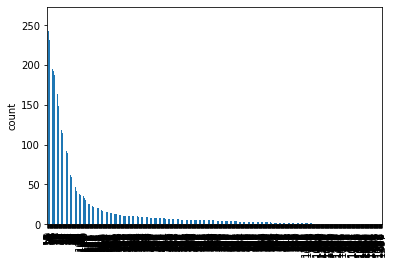

In [58]:
#univariate analysis for the blue cars returned column 

df.bluecars_returned_sum.value_counts().plot(kind='bar')
plt.ylabel('count')

Text(0, 0.5, 'count')

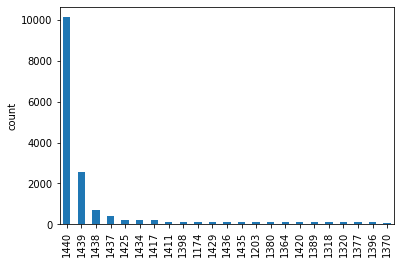

In [59]:
#univariate analysis for the number of daily data poinst that were available for aggregation, that day

df.n_daily_data_points.value_counts().plot(kind='bar')
plt.ylabel('count')

Text(0, 0.5, 'count')

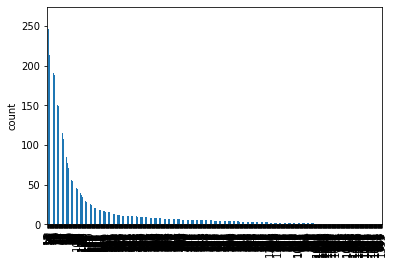

In [60]:
#univariate analysis for the blue cars taken column

df.bluecars_taken_sum.value_counts().plot(kind='bar')
plt.ylabel('count')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

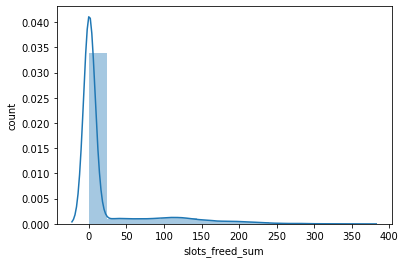

In [71]:
#univariate analysis for the freed slots

sns.distplot(df["slots_freed_sum"], bins=15)
plt.ylabel('count')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

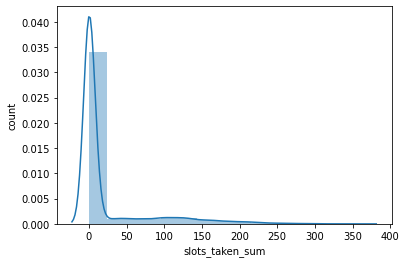

In [73]:
#univariate analysis for the taken slots

sns.distplot(df["slots_taken_sum"], bins=15)
plt.ylabel('count')

# 4. BIVARIATE ANALYSIS

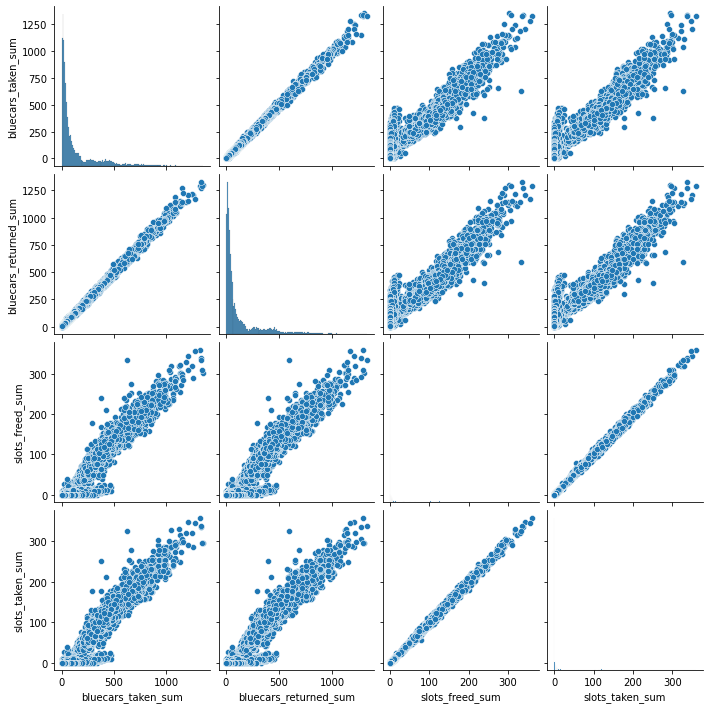

In [75]:
#PLotting a pairplot to show the different relations between different numerical variables
columns = ['bluecars_taken_sum','bluecars_returned_sum','slots_freed_sum','slots_taken_sum']
sns.pairplot(df[columns])

The pairplot depicts a strong relation between the variables

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


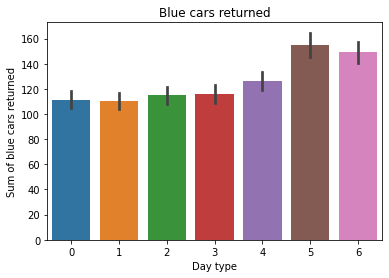

In [76]:
#Bar plot for blue cars returned
sns.barplot(df['dayofweek'], df['bluecars_returned_sum'])

#labelling the axes
plt.title('Blue cars returned')
plt.xlabel('Day type')
plt.ylabel('Sum of blue cars returned')
plt.show()

The above pairplot depicts a strong relation between the variables

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


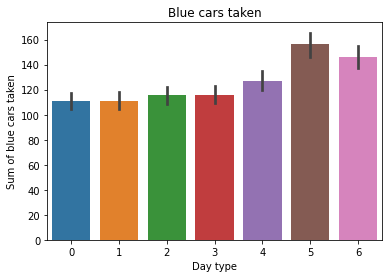

In [79]:
#Plotting a barplot of the sum of the blue cars taken throughout the week
sns.barplot(df['dayofweek'], df['bluecars_taken_sum'])

#labelling the axes
plt.title('Blue cars taken')
plt.xlabel('Day type')
plt.ylabel('Sum of blue cars taken')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


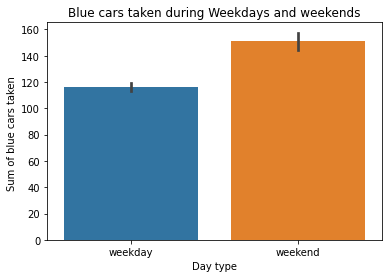

In [91]:
#Plotting a bar chart for the blue cars taken during different day types
sns.barplot(df['day_type'], df['bluecars_taken_sum'])

#labelling the axes
plt.title('Blue cars taken during Weekdays and weekends')
plt.xlabel('Day type')
plt.ylabel('Sum of blue cars taken ')
plt.show()

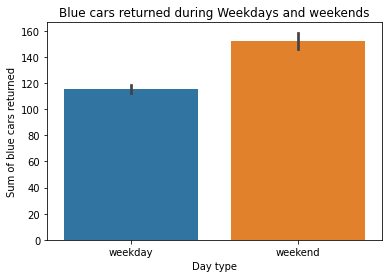

In [ ]:
#Plotting a bar chart for the blue cars returned during different day types
sns.barplot(df['day_type'], df['bluecars_returned_sum'])

#labelling the axes
plt.title('Blue cars returned during Weekdays and weekends')
plt.xlabel('Day type')
plt.ylabel('Sum of blue cars returned')
plt.show()

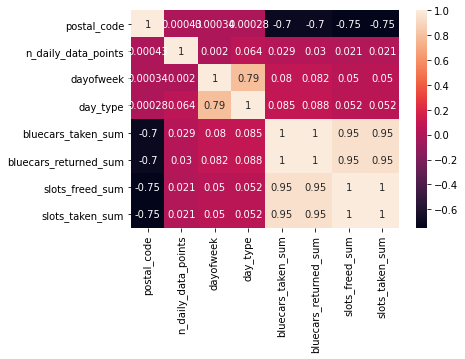

In [96]:
#Plottting a heatmap to show correlation of different numerical variables
sns.heatmap(df.corr(), xticklabels = df.corr().columns, yticklabels = df.corr().columns, annot=True)

# 5. MULTIVARIATE ANALYSIS

In [146]:
#Separating features and labels
X = df.iloc[:, 5:].values
y = df.iloc[:, 4].values


In [147]:
#Split the data into a training set and testing set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [148]:
# We now need to perform feature scaling.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [155]:
# Peforming LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [156]:
#Training and Making Predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [158]:
#Performance evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


[[2297   16]
 [ 879   25]]
Accuracy 0.7217904880323283


# 6. HYPOTHESIS TESTING

## 6.1 Hypothesis Statement Formulation

* **Null hypothesis.**

**Ho**: The mean number of blue cars taken on the weekends from different postal codes is equal.
Ho: U1 = U2

* **Alternative hypothesis.**

**H1**:The mean number of blue cars taken on the weekends from different postal codes is not equal.
Ho: U1 ≠ U2

In [162]:
#Obtaining data for the blue cars taken over the weekend
df_H=df[(df['day_type']=='weekend') & (df['bluecars_taken_sum']!=0)]
df_H.info


<bound method DataFrame.info of        postal_code       date  ...  slots_freed_sum  slots_taken_sum
5            75001 2018-01-06  ...               38               35
6            75001 2018-01-07  ...               34               34
12           75001 2018-01-13  ...               38               38
13           75001 2018-01-14  ...               22               20
19           75001 2018-01-20  ...               41               39
...            ...        ...  ...              ...              ...
16068        95880 2018-06-03  ...                0                0
16074        95880 2018-06-09  ...                0                0
16075        95880 2018-06-10  ...                0                0
16081        95880 2018-06-16  ...                0                0
16082        95880 2018-06-17  ...                0                0

[4520 rows x 9 columns]>

In [183]:
#Choosing a sample from our dataset
#Using Random sampling to select our sample

df_sample_1 = df_H.sample(n=2000, replace = "True", random_state=1)
df_sample_1.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
838,75006,2018-03-03,1440,5,weekend,315,321,71,74
14172,94160,2018-04-28,1440,5,weekend,90,86,5,4
3214,75112,2018-04-08,1440,6,weekend,12,12,1,1
9858,92800,2018-02-17,1440,5,weekend,98,95,5,5
10326,93130,2018-02-17,1440,5,weekend,35,29,0,0


In [185]:
#Choosing two postal codes using simple random sampling to compare two different areas
df_sample_2 = df_sample_1.sample(n=2, replace="False", random_state=1)
df_sample_2.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
12585,93600,2018-03-31,1440,5,weekend,16,15,0,0
2135,75014,2018-04-21,1440,5,weekend,610,635,155,160


In [260]:
#Creating a dataset with only the 94110 postal code
df_sample_3 = df3 = df_H[df_H['postal_code'] == 93600]
df_sample_3.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
12504,93600,2018-01-06,1437,5,weekend,24,34,0,0
12505,93600,2018-01-07,1440,6,weekend,26,13,0,0
12511,93600,2018-01-13,1440,5,weekend,18,24,0,0
12512,93600,2018-01-14,1440,6,weekend,25,18,0,0
12518,93600,2018-01-20,1439,5,weekend,27,25,0,0


In [261]:
#Creating another dataset with only the 92400 postal code
df_sample_4 = df3 = df_H[df_H['postal_code'] == 75014]
df_sample_4.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
2033,75014,2018-01-06,1437,5,weekend,573,582,163,169
2034,75014,2018-01-07,1440,6,weekend,575,596,156,162
2040,75014,2018-01-13,1440,5,weekend,677,695,171,178
2041,75014,2018-01-14,1440,6,weekend,655,654,177,170
2047,75014,2018-01-20,1439,5,weekend,640,651,144,152


### 6.1.1 Checking for Normality

We'll check for normality in the sampled datasets of the 2 postal codes.

Text(0.5, 1.0, 'Q-Q plot for the 94110 postal code')

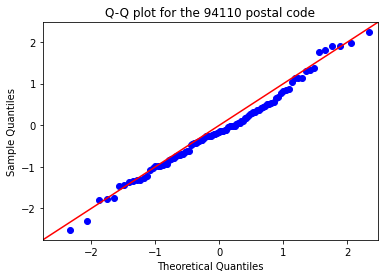

In [256]:
# np.random generates different random numbers everytime the code is executed.
df_sample_3 = np.random.normal(0, 1, 100)     
  
sm.qqplot(df_sample_3, line ='45') 

py.title('Q-Q plot for the 94110 postal code')


Text(0.5, 1.0, 'Q-Q plot for the 92400 postal code')

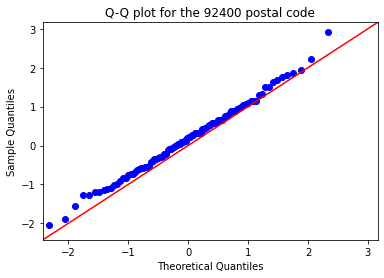

In [257]:
# np.random generates different random numbers everytime the code is executed.
df_sample_4 = np.random.normal(0, 1, 100)     
  
sm.qqplot(df_sample_4, line ='45') 
py.title('Q-Q plot for the 92400 postal code')


## 6.2 **Hypothesis Testing**

In [258]:
#Calculating the z score for calculating the mean of the two samples
import math as m
#Calculating the mean of the blue cars returned
mean1 = df_sample_3.mean()
mean2 = df_sample_4.mean()
#Calculating the mean difference
mean_difference = mean1 - mean2
#Calculating the standard deviation of the two samples
std1 = df_sample_3.std()
std2 = df_sample_4.std()
#Calculating the number of rows in each 
n1 = df_sample_3.shape
n2 = df_sample_4.shape

z_score = (mean1 - mean2)/m.sqrt((std1/n1)+(std2/n2))
z_score

-2.2131720821828034

In [259]:
#Calculating the p value
pval = stats.norm.cdf(z_score)
print(pval)
#Using an alpha level of 0.05
if pval < 0.05:
    print("Reject null hypothesis")
else:
    print("Accept the null hypothesis")

0.013442892026633827
Reject null hypothesis


## 6.3 **Hypothesis testing interpretation**


The null hypothesis is rejected when: 

P-Value < significance level.
In the research, the P-Value is less than the significance level i.e. 0.0.0134 < 0.05.
In this case we reject the null hypothesis and conclude that:

On the weekends, the number of blue cars taken in two different postal codes is not equal on the weekends.